In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_folder = "/data/Pein/Pytorch/Wind-Power-Prediction/res_output/"

time_folder = "24-08-22-wd_val_split_epoch_bs-search"


path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 100000
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.columns)

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]

# remove df where the rows values are repeated
df = df.drop_duplicates(subset=["train_rmse", "val_rmse", "test_rmse"], keep="first")


Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'vs', 'd',
       'hd', 'ld', 'td', 'timed', 'pd', 'el', 'nh', 'cd', 'tck', 'fck', 'nt',
       'sm', 'up', 'sl', 'mlp', 'ep', 'bs', 'lr', 'dp', 'wd'],
      dtype='object')


In [3]:
import math


def plot_rmse_effects(
    df, x, y=["train_custom_acc", "val_custom_acc", "test_custom_acc"]
):
    for rmse in y:
        # Calculate the grid size
        num_features = len(x)
        num_rows = math.ceil(num_features / 3)  # Number of rows required
        num_cols = min(3, num_features)  # Number of columns (max 3)

        # Create subplots with the calculated grid size
        fig, axes = plt.subplots(
            num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows)
        )

        # Flatten axes array if there's more than one row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]  # Wrap single row axes in a list

        for i, feature in enumerate(x):
            sns.boxplot(ax=axes[i], x=feature, y=rmse, data=df)
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)

        # Remove any empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

Available features to plot: ['wd', 'vs', 'mlp', 'sl', 'ep', 'lr', 'd', 'hd', 'ld', 'td', 'timed', 'pd', 'el', 'tck', 'cd', 'fck', 'dp', 'nt', 'nh', 'up', 'sm', 'bs']


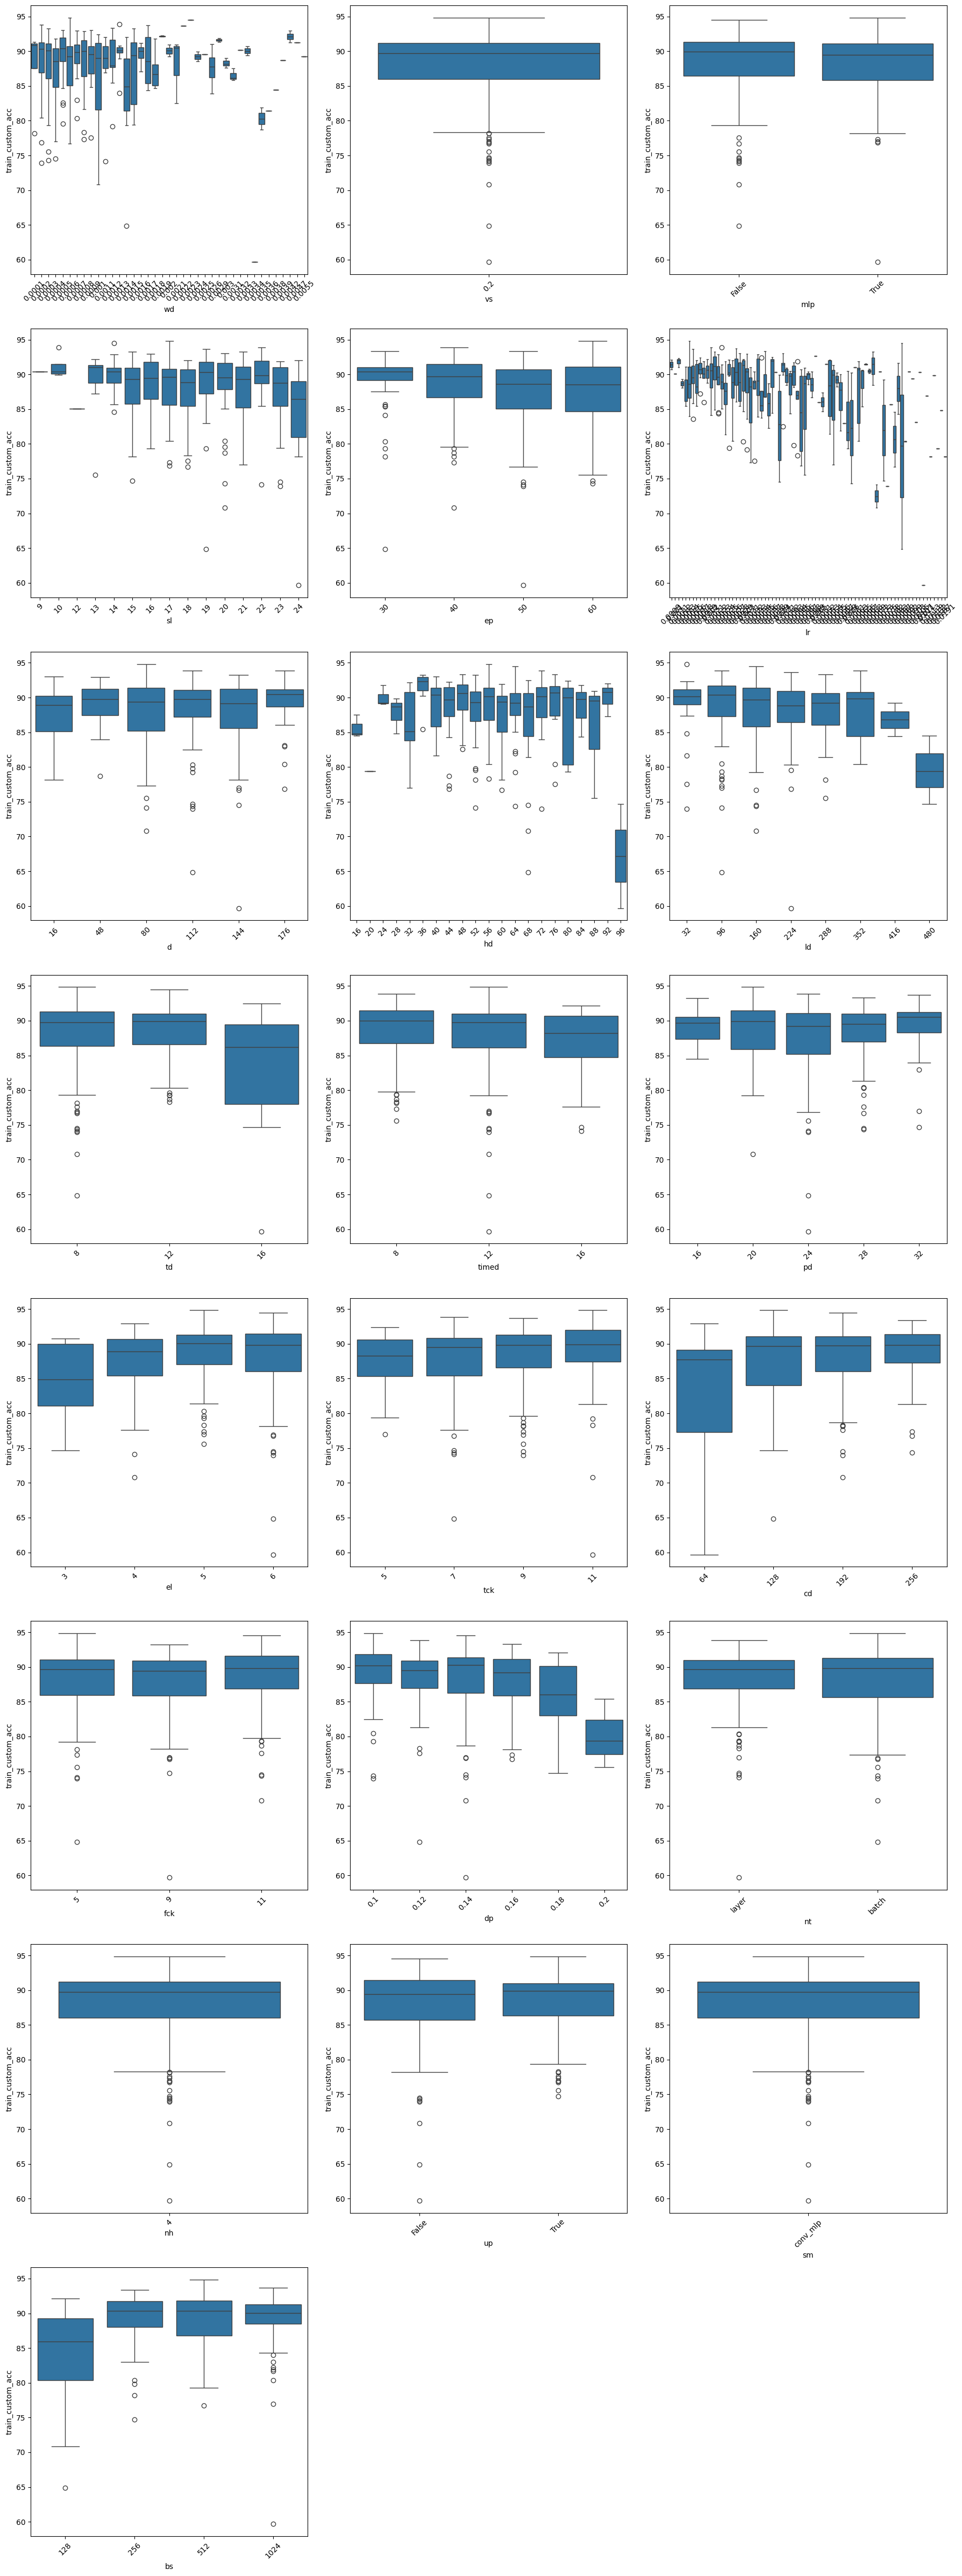

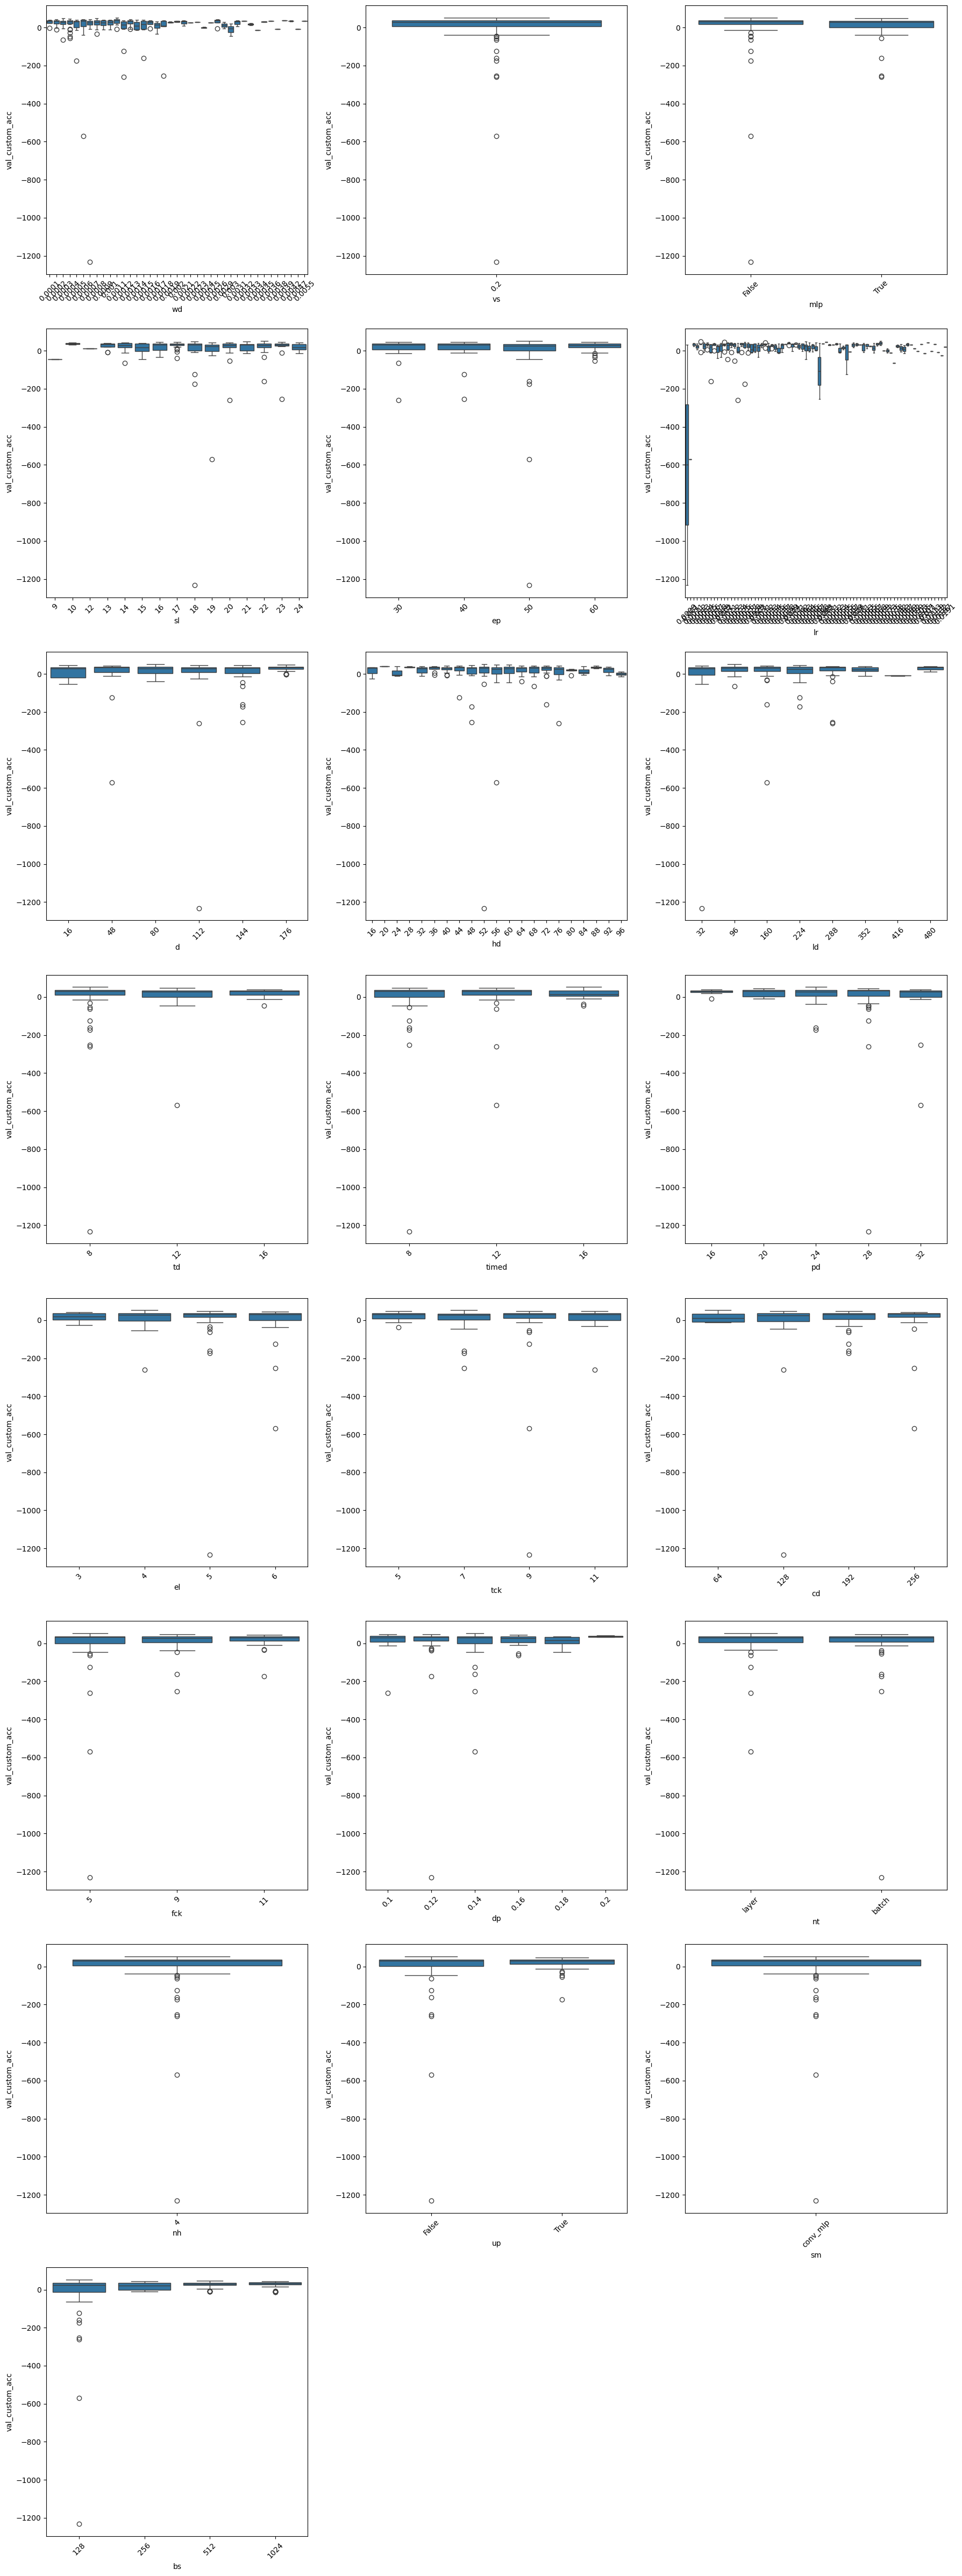

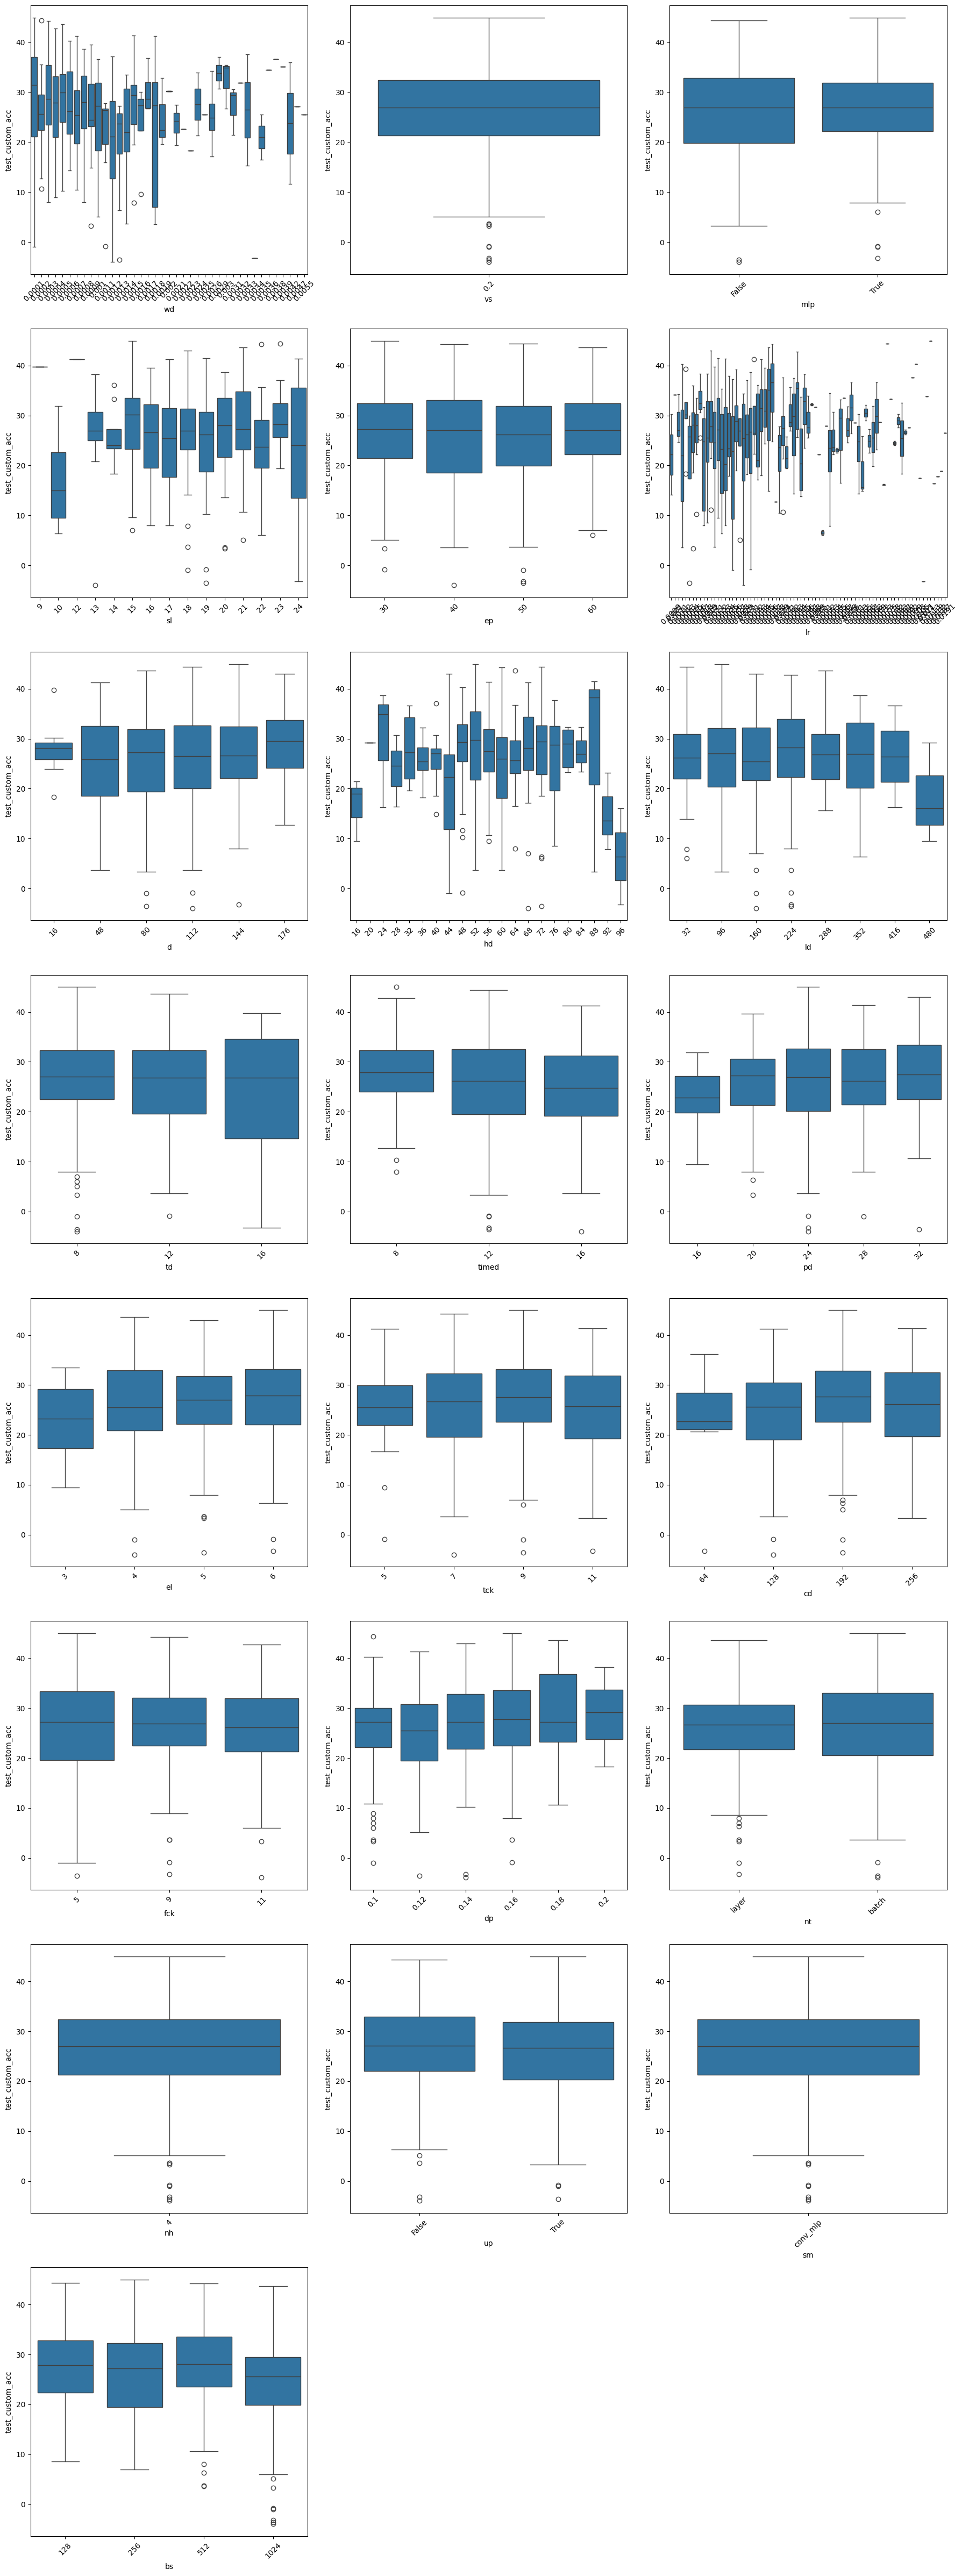

In [10]:
plot_features = [
    "wd",        # weight_decay
    "vs",        # val_split
    "mlp",       # mlp_norm
    "sl",        # seq_len
    "ep", 
    "lr",        # learning_rate
    "d",         # d_model
    "hd",        # hidden_d_model
    "ld",        # last_d_model
    "td",        # token_d_model
    "timed",     # time_d_model
    "pd",        # pos_d_model
    "el",        # e_layers
    "tck",       # token_conv_kernel
    "cd",        # conv_out_dim
    "fck",       # feat_conv_kernel
    "dp",        # dropout
    "nt",        # norm_type
    "nh",        # num_heads
    "up",        # use_pos_enc
    "sm",        # skip_connection_mode
    "bs",
    "te",
]


# Check which features are in the DataFrame
available_features = [feature for feature in plot_features if feature in df.columns]

# Print the available features
print("Available features to plot:", available_features)

# Now, you can plot the effects using the available features
plot_rmse_effects(df, x=available_features)

In [11]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0 * df["train_rmse"] + 0.4 * df["val_rmse"] + 0.4 * df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse", ascending=True)


In [12]:
sorted_df.columns

Index(['exp_date', 'train_rmse', 'train_custom_acc', 'val_rmse_for_best_train',
       'val_custom_acc_for_best_train', 'test_rmse_for_best_train',
       'test_custom_acc_for_best_train', 'train_epoch_for_best_train',
       'val_rmse', 'val_custom_acc', 'train_rmse_for_best_val',
       'train_custom_acc_for_best_val', 'test_rmse_for_best_val',
       'test_custom_acc_for_best_val', 'val_epoch_for_best_val', 'test_rmse',
       'test_custom_acc', 'train_rmse_for_best_test',
       'train_custom_acc_for_best_test', 'val_rmse_for_best_test',
       'val_custom_acc_for_best_test', 'test_epoch_for_best_test', 'vs', 'd',
       'hd', 'ld', 'td', 'timed', 'pd', 'el', 'nh', 'cd', 'tck', 'fck', 'nt',
       'sm', 'up', 'sl', 'mlp', 'ep', 'bs', 'lr', 'dp', 'wd', 'sum_rmse'],
      dtype='object')

In [13]:
selected_cols = [
    "train_rmse",
    "train_custom_acc",
    "val_rmse",
    "val_custom_acc",
    "test_rmse_for_best_val",
    "test_rmse",
    "test_custom_acc",
    "val_custom_acc_for_best_test",
]
sorted_df[selected_cols].head(10)

,train_rmse,train_custom_acc,val_rmse,val_custom_acc,test_rmse_for_best_val,test_rmse,test_custom_acc,val_custom_acc_for_best_test
98,7396.6343,92.127083,67042.360,32.669090,67083.234,65571.780,30.234999,30.544794
224,7812.3955,91.530380,67164.740,22.835558,72872.250,66026.400,32.141453,38.026131
2,8481.5010,90.946701,70901.500,28.769230,73077.484,66040.650,41.528999,27.700806
271,9612.8090,89.216110,69687.680,33.666046,74688.710,67859.760,32.619934,-2.436531
166,13234.4650,86.995903,65100.117,43.236607,73770.620,72538.086,24.207151,33.790607
41,9131.5490,90.365402,69935.125,36.481457,73461.445,67788.060,26.524359,33.328609
81,7469.9830,92.011467,68274.110,29.731459,76256.520,69523.770,31.908775,31.557148
266,11688.6890,88.621201,69001.580,40.546459,69387.250,69104.305,34.736675,34.336250
179,8870.6160,90.615082,66474.680,37.620491,77300.260,71891.234,25.382931,39.067204
124,8289.3760,90.395668,67099.810,39.936077,73198.370,71283.400,23.388308,35.599590


In [14]:
# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)


In [15]:
# print last few columns
print(output.iloc[:, -20:])

      ld  td  timed  pd  el  nh   cd  tck  fck     nt        sm     up  sl  \
98   160   8      8  20   5   4  192    9   11  layer  conv_mlp   True  21   
224  224   8      8  24   5   4  192    5    5  batch  conv_mlp  False  23   
2    160   8      8  32   6   4  192    9   11  batch  conv_mlp  False  19   
271  224  12     12  32   5   4  256    9   11  batch  conv_mlp  False  19   
166  160   8      8  24   5   4  192   11    5  batch  conv_mlp  False  22   
41   224   8      8  24   5   4  256    9    5  layer  conv_mlp   True  18   
81    32   8      8  16   4   4  256   11   11  layer  conv_mlp   True  19   
266  160   8      8  24   6   4  256   11    9  layer  conv_mlp  False  24   
179  160   8     12  28   6   4  256    7    9  layer  conv_mlp  False  18   
124   96   8      8  28   6   4  256    9    9  batch  conv_mlp   True  14   

       mlp  ep    bs      lr    dp      wd    sum_rmse  
98   False  50   128  0.0009  0.12  0.0006  53045.6560  
224   True  60   256  0.006